In [1]:
import os
import fnmatch as fn
import numpy as np
import pandas as pd
import dbfread

import pandas_profiling as pp
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from math import sin,cos,sqrt,atan2,radians 

import glob
import requests
import logging
import time
import googlemaps
import reverse_geocoder
import pprint
import folium
import zipfile
import json

matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호도 표시

# 한글 깨짐 방지 목적 #
# font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
# rc('font',family = font_name)

import plotly
import cufflinks as cf
import plotly.graph_objs as go
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
from plotly.offline import init_notebook_mode, plot,iplot

init_notebook_mode(connected = True)
cf.go_offline()

import warnings
warnings.filterwarnings(action='ignore') # 경고 메시지를 숨길 때

In [70]:
shape_visual = gpd.read_file('TL_SCCO_EMD.shp',
                             encoding = 'euckr')

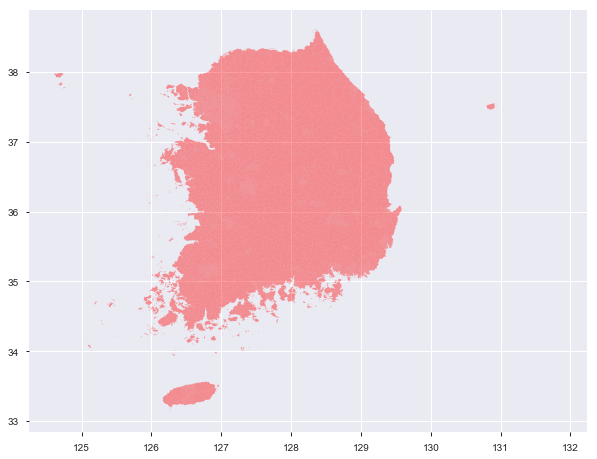

In [71]:
fig,ax = plt.subplots(figsize = (10,10))
shape_visual.plot(ax = ax, alpha=0.4,color = 'red')

In [72]:
#동쪽 끝 #
xmin,ymin,xmax,ymax = shape_visual[shape_visual['EMD_KOR_NM'] == '강일동'].total_bounds
east_max = xmax

xmin,ymin,xmax,ymax = shape_visual[shape_visual['EMD_KOR_NM'] == '양재동'].total_bounds
south_max = ymin

xmin,ymin,xmax,ymax = shape_visual[shape_visual['EMD_KOR_NM'] == '오곡동'].total_bounds
west_max = xmin

xmin,ymin,xmax,ymax = shape_visual[shape_visual['EMD_KOR_NM'] == '도봉동'].total_bounds
north_max = ymax

In [113]:
#xmax
#xmax - xmin
a = np.arange(west_max,east_max,0.005)
b = np.arange(south_max,north_max,0.005)

In [114]:
print(len(a))
print(len(b))

9
5


In [115]:
b

array([37.45146311, 37.50146311, 37.55146311, 37.60146311, 37.65146311])

In [116]:
k = []
for i in range(len(a)):
    for j in range(len(b)):
        t = [a[i],b[j]]
        k.append(t)

In [117]:
k
#len(k)

[[126.7644839582246, 37.45146310567998],
 [126.7644839582246, 37.501463105679974],
 [126.7644839582246, 37.55146310567997],
 [126.7644839582246, 37.60146310567997],
 [126.7644839582246, 37.651463105679966],
 [126.8144839582246, 37.45146310567998],
 [126.8144839582246, 37.501463105679974],
 [126.8144839582246, 37.55146310567997],
 [126.8144839582246, 37.60146310567997],
 [126.8144839582246, 37.651463105679966],
 [126.8644839582246, 37.45146310567998],
 [126.8644839582246, 37.501463105679974],
 [126.8644839582246, 37.55146310567997],
 [126.8644839582246, 37.60146310567997],
 [126.8644839582246, 37.651463105679966],
 [126.9144839582246, 37.45146310567998],
 [126.9144839582246, 37.501463105679974],
 [126.9144839582246, 37.55146310567997],
 [126.9144839582246, 37.60146310567997],
 [126.9144839582246, 37.651463105679966],
 [126.96448395822459, 37.45146310567998],
 [126.96448395822459, 37.501463105679974],
 [126.96448395822459, 37.55146310567997],
 [126.96448395822459, 37.60146310567997],
 [1

In [118]:
len(k)

45

In [140]:
csv_files1 = pd.read_csv('data_A_경도위도.csv')
csv_files1 = csv_files1.iloc[:,2:]

csv_files2 = pd.read_csv('data_B_경도위도.csv')
csv_files2 = csv_files2.iloc[:,2:]

csv_files3 = pd.read_csv('data_C_경도위도.csv')
csv_files3 = csv_files3.iloc[:,2:]

csv_files4 = pd.read_csv('data_D_경도위도.csv')
csv_files4 = csv_files4.iloc[:,2:]

csv_files5 = pd.read_csv('data_E_경도위도.csv')
csv_files5 = csv_files5.iloc[:,2:]

csv_files6 = pd.read_csv('data_F_경도위도.csv')
csv_files6 = csv_files6.iloc[:,2:]

csv_files7 = pd.read_csv('data_G_경도위도.csv')
csv_files7 = csv_files7.iloc[:,2:]

csv_files8 = pd.read_csv('data_H_경도위도.csv')
csv_files8 = csv_files8.iloc[:,2:]

csv_files9 = pd.read_csv('data_I_경도위도.csv')
csv_files9 = csv_files9.iloc[:,2:]


In [147]:
cctv = pd.read_csv('CCTV 경도위도.csv',engine='python')
subway = pd.read_csv('지하철 경도위도.csv',engine='python')
accident = pd.read_csv('교통사고다발지역 경도위도.csv',engine='python')

In [148]:
len(cctv)

21345

In [122]:
len(subway)

576

In [123]:
len(accident)

4508

In [124]:
len(csv_files1)

11578

In [125]:
len(csv_files2)

15430

In [126]:
len(csv_files3)

64344

In [127]:
len(csv_files4)

124782

In [128]:
len(csv_files5)

3047

In [129]:
len(csv_files6)

130

In [130]:
len(csv_files7)

131687

In [131]:
len(csv_files8)

18826

In [132]:
len(csv_files9)

31247

# dist_func function
경위도를 기반으로 두 위치간의 거리를 자동으로 계산해주는 함수를 만든다

In [133]:
# Approximate radius of earth(km)
r = 6373.0

def dist_func(lat1,lon1,lat2,lon2): # 위도1, 경도1, 위도2, 경도2
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    k1 = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    k2 = 2 * atan2(sqrt(k1),sqrt(1-k1))
    distance = r * k2
    return distance

dist_func(52.2296756,21.0122287,52.406374,16.9251681) # 278.54558935106695(Km)

278.54558935106695

# Dist_radius

cctv

In [165]:
t = []
for j in range(len(k)):
    a,b = k[j]
    #print(a) # 경도
    #print(b) # 위도
    w = 0
    for i in range(len(cctv)):     
        c,d = cctv.iloc[i:i+1,:].values[0][0],cctv.iloc[i:i+1,:].values[0][1]
       # print(c) # 위도
       # print(d) # 경도
        z = dist_func(b,a,c,d)
        if (z<2.5):
            w +=1
    t.append(w)    

subway

In [151]:
t2 = []
for j in range(len(k)):
    a,b = k[j]
    w2 = 0
    for i in range(len(subway)):
        c,d = subway.iloc[i:i+1,:].values[0][0],subway.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<2.5):
            w2 +=1
    t2.append(w2)

accident

In [153]:
t3 = []
for j in range(len(k)):
    a,b = k[j]
    w3 = 0
    for i in range(len(accident)):
        c,d = accident.iloc[i:i+1,:].values[0][0],accident.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<2.5):
            w3 +=1
    t3.append(w3)

소상공인(상권)

In [156]:
t4 = []
for j in range(len(k)):
    a,b = k[j]
    w4 = 0
    for i in range(len(csv_files1)):
        c,d = csv_files1.iloc[i:i+1,:].values[0][0],csv_files1.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<2.5):
            w4 +=1
    t4.append(w4)

In [157]:
t5 = []
for j in range(len(k)):
    a,b = k[j]
    w5 = 0
    for i in range(len(csv_files2)):
        c,d = csv_files2.iloc[i:i+1,:].values[0][0],csv_files2.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<2.5):
            w5 +=1
    t5.append(w5)

In [160]:
t6 = []
for j in range(len(k)):
    a,b = k[j]
    w6 = 0
    for i in range(len(csv_files3)):
        c,d = csv_files3.iloc[i:i+1,:].values[0][0],csv_files3.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<2.5):
            w6 +=1
    t6.append(w6)

In [158]:
t7 = []
for j in range(len(k)):
    a,b = k[j]
    w7 = 0
    for i in range(len(csv_files4)):
        c,d = csv_files4.iloc[i:i+1,:].values[0][0],csv_files4.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<2.5):
            w7 +=1
    t7.append(w7)

In [159]:
t8 = []
for j in range(len(k)):
    a,b = k[j]
    w8 = 0
    for i in range(len(csv_files5)):
        c,d = csv_files5.iloc[i:i+1,:].values[0][0],csv_files5.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<2.5):
            w8 +=1
    t8.append(w8)

In [161]:
t9 = []
for j in range(len(k)):
    a,b = k[j]
    w9 = 0
    for i in range(len(csv_files6)):
        c,d = csv_files6.iloc[i:i+1,:].values[0][0],csv_files6.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<2.5):
            w9 +=1
    t9.append(w9)

In [162]:
t10 = []
for j in range(len(k)):
    a,b = k[j]
    w10 = 0
    for i in range(len(csv_files7)):
        c,d = csv_files7.iloc[i:i+1,:].values[0][0],csv_files7.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<2.5):
            w10 +=1
    t10.append(w10)

In [163]:
t11 = []
for j in range(len(k)):
    a,b = k[j]
    w11 = 0
    for i in range(len(csv_files8)):
        c,d = csv_files8.iloc[i:i+1,:].values[0][0],csv_files8.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<2.5):
            w11 +=1
    t11.append(w11)

In [164]:
t12 = []
for j in range(len(k)):
    a,b = k[j]
    w12 = 0
    for i in range(len(csv_files9)):
        c,d = csv_files9.iloc[i:i+1,:].values[0][0],csv_files9.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<2.5):
            w12 +=1
    t12.append(w12)

1. cctv : t
2. subway : t2
3. accident : t3
4. 소상공인 : t4 - t12

## Merge

In [176]:
df = pd.DataFrame(k, columns=['경도','위도'])
df.head()

,경도,위도
0,126.764484,37.451463
1,126.764484,37.501463
2,126.764484,37.551463
3,126.764484,37.601463
4,126.764484,37.651463


In [178]:
df['t'] = t
df['t2'] = t2
df['t3'] = t3
df['t4'] = t4
df['t5'] = t5
df['t6'] = t6
df['t7'] = t7
df['t8'] = t8
df['t9'] = t9
df['t10'] = t10
df['t21'] = t11
df['t12'] = t12

In [179]:
df.head()

,경도,위도,t,t2,t3,t4,t5,t6,t7,t8,t9,t10,t21,t12
0,126.764484,37.451463,0,3,7,0,0,0,0,0,0,0,0,0
1,126.764484,37.501463,0,7,112,0,0,0,0,0,0,0,0,0
2,126.764484,37.551463,0,2,4,0,0,5,2,0,0,0,0,0
3,126.764484,37.601463,0,0,1,0,0,0,0,0,0,0,0,0
4,126.764484,37.651463,0,4,34,0,0,0,0,0,0,0,0,0


In [180]:
df.to_csv('dataset.csv', index=False, encoding='cp949')

## 신림동

In [194]:
xmin,ymin,xmax,ymax = shape_visual[shape_visual['EMD_KOR_NM'] == '신림동'].total_bounds
a2 = np.arange(xmin,xmax,0.01)
b2 = np.arange(ymin,ymax,0.01)

In [195]:
print(len(a2))
print(len(b2))

8
6


In [196]:
b2

array([37.43571235, 37.44571235, 37.45571235, 37.46571235, 37.47571235,
       37.48571235])

In [197]:
k = []
for i in range(len(a2)):
    for j in range(len(b2)):
        t = [a2[i],b2[j]]
        k.append(t)

In [198]:
len(k)

48

cctv

In [199]:
# cctv
t = []
for j in range(len(k)):
    a,b = k[j]
    #print(a) # 경도
    #print(b) # 위도
    w = 0
    for i in range(len(cctv)):     
        c,d = cctv.iloc[i:i+1,:].values[0][0],cctv.iloc[i:i+1,:].values[0][1]
       # print(c) # 위도
       # print(d) # 경도
        z = dist_func(b,a,c,d)
        if (z<0.5):
            w +=1
    t.append(w)    

subway

In [201]:
t2 = []
for j in range(len(k)):
    a,b = k[j]
    w2 = 0
    for i in range(len(subway)):
        c,d = subway.iloc[i:i+1,:].values[0][0],subway.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<0.5):
            w2 +=1
    t2.append(w2)

accident

In [202]:
t3 = []
for j in range(len(k)):
    a,b = k[j]
    w3 = 0
    for i in range(len(accident)):
        c,d = accident.iloc[i:i+1,:].values[0][0],accident.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<0.5):
            w3 +=1
    t3.append(w3)

소상공인(상권)

In [203]:
t4 = []
for j in range(len(k)):
    a,b = k[j]
    w4 = 0
    for i in range(len(csv_files1)):
        c,d = csv_files1.iloc[i:i+1,:].values[0][0],csv_files1.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<0.5):
            w4 +=1
    t4.append(w4)

In [204]:
t5 = []
for j in range(len(k)):
    a,b = k[j]
    w5 = 0
    for i in range(len(csv_files2)):
        c,d = csv_files2.iloc[i:i+1,:].values[0][0],csv_files2.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<0.5):
            w5 +=1
    t5.append(w5)

In [205]:
t6 = []
for j in range(len(k)):
    a,b = k[j]
    w6 = 0
    for i in range(len(csv_files3)):
        c,d = csv_files3.iloc[i:i+1,:].values[0][0],csv_files3.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<0.5):
            w6 +=1
    t6.append(w6)

In [206]:
t7 = []
for j in range(len(k)):
    a,b = k[j]
    w7 = 0
    for i in range(len(csv_files4)):
        c,d = csv_files4.iloc[i:i+1,:].values[0][0],csv_files4.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<0.5):
            w7 +=1
    t7.append(w7)

In [207]:
t8 = []
for j in range(len(k)):
    a,b = k[j]
    w8 = 0
    for i in range(len(csv_files5)):
        c,d = csv_files5.iloc[i:i+1,:].values[0][0],csv_files5.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<0.5):
            w8 +=1
    t8.append(w8)

In [208]:
t9 = []
for j in range(len(k)):
    a,b = k[j]
    w9 = 0
    for i in range(len(csv_files6)):
        c,d = csv_files6.iloc[i:i+1,:].values[0][0],csv_files6.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<0.5):
            w9 +=1
    t9.append(w9)

In [209]:
t10 = []
for j in range(len(k)):
    a,b = k[j]
    w10 = 0
    for i in range(len(csv_files7)):
        c,d = csv_files7.iloc[i:i+1,:].values[0][0],csv_files7.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<0.5):
            w10 +=1
    t10.append(w10)

In [210]:
t11 = []
for j in range(len(k)):
    a,b = k[j]
    w11 = 0
    for i in range(len(csv_files8)):
        c,d = csv_files8.iloc[i:i+1,:].values[0][0],csv_files8.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<0.5):
            w11 +=1
    t11.append(w11)

In [211]:
t12 = []
for j in range(len(k)):
    a,b = k[j]
    w12 = 0
    for i in range(len(csv_files9)):
        c,d = csv_files9.iloc[i:i+1,:].values[0][0],csv_files9.iloc[i:i+1,:].values[0][1]
        z = dist_func(b,a,c,d)
        if (z<0.5):
            w12 +=1
    t12.append(w12)

In [217]:
df2 = pd.DataFrame(k, columns=['경도','위도'])
df2.head()

,경도,위도
0,126.898944,37.435712
1,126.898944,37.445712
2,126.898944,37.455712
3,126.898944,37.465712
4,126.898944,37.475712


In [218]:
df2['t'] = t
df2['t2'] = t2
df2['t3'] = t3
df2['t4'] = t4
df2['t5'] = t5
df2['t6'] = t6
df2['t7'] = t7
df2['t8'] = t8
df2['t9'] = t9
df2['t10'] = t10
df2['t11'] = t11
df2['t12'] = t12

In [219]:
df2.head()

,경도,위도,t,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12
0,126.898944,37.435712,2,1,0,2,4,26,48,0,0,37,2,3
1,126.898944,37.445712,14,0,2,9,20,62,133,1,0,74,5,51
2,126.898944,37.455712,29,1,11,53,28,143,323,17,0,360,39,41
3,126.898944,37.465712,61,0,7,36,39,175,441,8,0,341,30,77
4,126.898944,37.475712,50,0,5,17,44,148,235,5,0,270,16,33


In [220]:
df2.to_csv('df.csv', index=False, encoding='cp949')